CSV Creation & Data Manipulation

In [1]:
import pandas as pd

# Define data to be written to the csv file

# Items list []
data = [['Minced Pork', 6.00,'Kaufland', 'Protein', '1000g' ],
        ['Brown Rice', 2.60, 'Rewe', 'Carbohydrates', '1000g'],
        ['Bread', 1.00, 'Rewe', 'Carbohydrates', '500g' ],
        ['Eggs', 2.00, 'Kaufland', 'Protein', '500g' ],
        ['Oats', 0.80, 'Rewe', 'Carbohydrates', '500g'],
        ['Bananas', 1.80, 'Rewe', 'Carbohydrates', '1000g']]

# Convert list to pd df

df = pd.DataFrame(data, columns=['Name', 'Price', 'Store', 'Type', 'Quantity' ])

# Print the DataFrame
print(df)

          Name  Price     Store           Type Quantity
0  Minced Pork    6.0  Kaufland        Protein    1000g
1   Brown Rice    2.6      Rewe  Carbohydrates    1000g
2        Bread    1.0      Rewe  Carbohydrates     500g
3         Eggs    2.0  Kaufland        Protein     500g
4         Oats    0.8      Rewe  Carbohydrates     500g
5      Bananas    1.8      Rewe  Carbohydrates    1000g


In [2]:
print(df.columns)

Index(['Name', 'Price', 'Store', 'Type', 'Quantity'], dtype='object')


In [3]:
# Sum the price column to 2 decimals

total_price = round(df['Price'].sum(), 2)

print(total_price)

14.2


In [4]:
# Add more items 

# add Row to DataFrame
list_row = ["Lentils",4.65 ,'Kaufland', "Carbohydrates", '1500g']
df.loc[len(df)] = list_row

print(df)

          Name  Price     Store           Type Quantity
0  Minced Pork   6.00  Kaufland        Protein    1000g
1   Brown Rice   2.60      Rewe  Carbohydrates    1000g
2        Bread   1.00      Rewe  Carbohydrates     500g
3         Eggs   2.00  Kaufland        Protein     500g
4         Oats   0.80      Rewe  Carbohydrates     500g
5      Bananas   1.80      Rewe  Carbohydrates    1000g
6      Lentils   4.65  Kaufland  Carbohydrates    1500g


In [5]:
# Sum the price column to 2 decimals

total_price = round(df['Price'].sum(), 3)

print(total_price)

18.85


In [6]:
# Print all Kaufland products

kaufland_products = df[df['Store'] == 'Kaufland']
print(kaufland_products)


          Name  Price     Store           Type Quantity
0  Minced Pork   6.00  Kaufland        Protein    1000g
3         Eggs   2.00  Kaufland        Protein     500g
6      Lentils   4.65  Kaufland  Carbohydrates    1500g


In [7]:
# Preview the df with the few changes made

df

,Name,Price,Store,Type,Quantity
0,Minced Pork,6.00,Kaufland,Protein,1000g
1,Brown Rice,2.60,Rewe,Carbohydrates,1000g
2,Bread,1.00,Rewe,Carbohydrates,500g
3,Eggs,2.00,Kaufland,Protein,500g
4,Oats,0.80,Rewe,Carbohydrates,500g
5,Bananas,1.80,Rewe,Carbohydrates,1000g
6,Lentils,4.65,Kaufland,Carbohydrates,1500g


In [8]:
print(total_price)

18.85


In [9]:
# Export the df to a csv

df.to_csv('Weekly_Groceries.csv', encoding='utf-8', index=False)

Manipulate the newly created CSV 'eval_gro.csv'

In [10]:
import pandas as pd

# To not alter the original df we create a "new_df" but it is a the same csv

new_df = pd.read_csv('Weekly_Groceries.csv') #, delimiter = ";")

new_df

,Name,Price,Store,Type,Quantity
0,Minced Pork,6.00,Kaufland,Protein,1000g
1,Brown Rice,2.60,Rewe,Carbohydrates,1000g
2,Bread,1.00,Rewe,Carbohydrates,500g
3,Eggs,2.00,Kaufland,Protein,500g
4,Oats,0.80,Rewe,Carbohydrates,500g
5,Bananas,1.80,Rewe,Carbohydrates,1000g
6,Lentils,4.65,Kaufland,Carbohydrates,1500g


In [11]:
# Add a new items only if it hasn't been added before
if all(item not in new_df['Name'].values for item in ['Chicken', 'Skyr']):
    # Add the 'item' row 
    new_df.loc[len(new_df)] = ['Chicken', 6.00, 'Rewe', 'Protein', '1000g']
    new_df.loc[len(new_df)] = ['Skyr', 1.50, 'Rewe', 'Protein', '500g']

new_df

,Name,Price,Store,Type,Quantity
0,Minced Pork,6.00,Kaufland,Protein,1000g
1,Brown Rice,2.60,Rewe,Carbohydrates,1000g
2,Bread,1.00,Rewe,Carbohydrates,500g
3,Eggs,2.00,Kaufland,Protein,500g
4,Oats,0.80,Rewe,Carbohydrates,500g
5,Bananas,1.80,Rewe,Carbohydrates,1000g
6,Lentils,4.65,Kaufland,Carbohydrates,1500g
7,Chicken,6.00,Rewe,Protein,1000g
8,Skyr,1.50,Rewe,Protein,500g


In [12]:
# Save the changes back to the CSV file
new_df.to_csv('Weekly_Groceries.csv', index=False)

In [13]:
# Reassign total_price 'origin'

total_price = new_df['Price'].sum()
print(f'Total price is: {total_price:.2f}' )

Total price is: 26.35


In [19]:
# Fix prices to be with 3 significant figures (float)

new_df['Price'] = pd.to_numeric(new_df['Price'])
new_df['Price'] = round(new_df['Price'], 3)

# Add the "free-range" eggs to the df, alter price, stor

new_df.loc[new_df['Name'] == 'Eggs', 'Price'] = 2.30
new_df.loc[new_df['Name'] == 'Eggs', 'Store'] = 'Penny'

# Remove (rename) Bread
# Replace with Peanut Butter

new_df.loc[new_df['Name'] == 'Bread', 'Price'] = 2.00
new_df.loc[new_df['Name'] == 'Bread', 'Quantity'] = '350g'
new_df.loc[new_df['Name'] == 'Bread', 'Name'] = 'Peanut Butter'
# Fix minced pork "Price", " Quantity"

new_df.loc[new_df['Name'] == 'Minced Pork', 'Price'] = 3.00
new_df.loc[new_df['Name'] == 'Minced Pork', 'Quantity'] = '500g'

# Display the updated df
new_df

,Name,Price,Store,Type,Quantity
0,Minced Pork,3.00,Kaufland,Protein,500g
1,Brown Rice,2.60,Rewe,Carbohydrates,1000
2,Peanut Butter,2.00,Rewe,Carbohydrates,350g
3,Eggs,2.30,Penny,Protein,500
4,Oats,0.80,Rewe,Carbohydrates,500
5,Bananas,1.50,Rewe,Carbohydrates,1000
6,Lentils,4.65,Kaufland,Carbohydrates,1500
7,Chicken,6.00,Rewe,Protein,1000
8,Skyr,1.50,Rewe,Protein,500


In [20]:
# Step 1: Convert 'Quantity' to string and remove 'g'
new_df['Quantity'] = new_df['Quantity'].astype(str).str.replace('g', '')

# Step 2: Convert 'Quantity' to int
new_df['Quantity'] = new_df['Quantity'].astype(int)

# Step 3: Change price for bananas
new_df.loc[new_df['Name'] == 'Bananas', 'Price'] = 1.50

# Step 3: Display final changes
new_df

,Name,Price,Store,Type,Quantity
0,Minced Pork,3.00,Kaufland,Protein,500
1,Brown Rice,2.60,Rewe,Carbohydrates,1000
2,Peanut Butter,2.00,Rewe,Carbohydrates,350
3,Eggs,2.30,Penny,Protein,500
4,Oats,0.80,Rewe,Carbohydrates,500
5,Bananas,1.50,Rewe,Carbohydrates,1000
6,Lentils,4.65,Kaufland,Carbohydrates,1500
7,Chicken,6.00,Rewe,Protein,1000
8,Skyr,1.50,Rewe,Protein,500


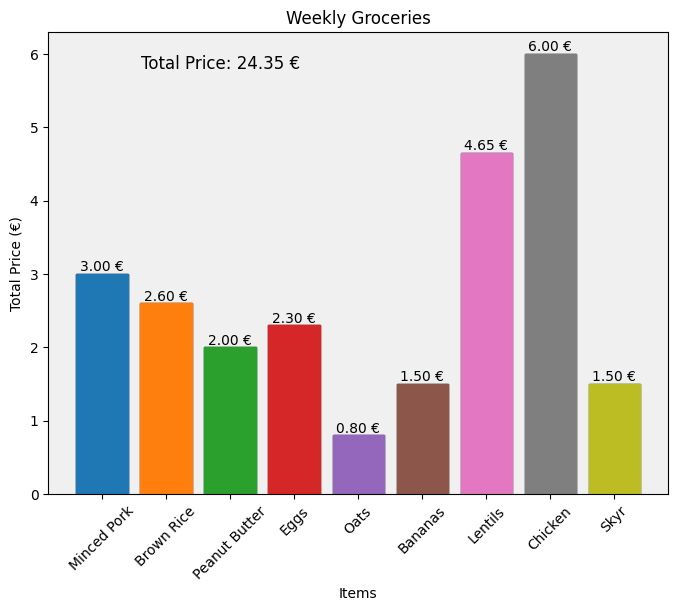

In [21]:
# Create a visualisation
import matplotlib.pyplot as plt
import os

# Create a bar chart (columns to be axis's)
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(new_df['Name'], new_df['Price'], color='#1f77b4', edgecolor='black')

# Set the title and labels
ax.set_title('Weekly Groceries')
ax.set_xlabel('Items')
ax.set_ylabel('Total Price (€)')

# X-Ticks, to make x axis labels rotate
plt.xticks(rotation=45)

# Set the background color of the plot
ax.set_facecolor('#f0f0f0')

# Calculate and display the total price for all items
total_price = new_df['Price'].sum()
ax.text(0.15, 0.95, f'Total Price: {total_price:.2f} €', transform=ax.transAxes, fontsize=12, verticalalignment='top')


# Add value labels to each bar
bars = ax.bar(new_df['Name'], new_df['Price'], color='#1f77b4', edgecolor='black')
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# For loop to repeat the action
for i, bar in enumerate(bars):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{new_df["Price"].iloc[i]:.2f} €', ha='center', va='bottom', fontsize=10)
    bar.set_color(colors[i % len(colors)])

# Get the path to the desired directory (path)
save_path = r'C:\Users\henry\OneDrive\Desktop\sampling\Projects\Weekly_Groceries'

# Save the figure to the Downloads directory as a jpeg image
plt.savefig(os.path.join(save_path, 'Weekly_Groceries.jpeg'), dpi=300, bbox_inches='tight')


# Display the chart
plt.show()


2nd Part 

To be Determined

In [18]:
print('waiting on input/expansion')

waiting on input/expansion
